## بسم الله الرحمن الرحيم

## Bilty Data from USA Government

In [213]:
path = 'example.txt'

with open(path) as f:
    print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [215]:
import json

with open(path) as f:
    records = [json.loads(line) for line in f]

In [218]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [221]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [229]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [230]:
##counts by time zone

def get_counts(data):
    counts = {}
    for x in data:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [235]:
## Another Approach
from collections import defaultdict
def get_counts2(data):
    counts = defaultdict(int)
    for x in data:
        counts[x] += 1
    return counts

In [236]:
counts = get_counts(time_zones)

In [245]:
## Top 10 zones and their corresponding counts
def top_counts(data, n=10):
    key_value_pair = [(count,tz) for tz, count in data.items()]
    key_value_pair.sort()
    return key_value_pair[-n:]


In [246]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [247]:
from collections import Counter

counts = Counter(time_zones)

In [250]:
##Counting using DataFrame
frame = pd.DataFrame(records)

In [251]:
frame.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [253]:
tz_counts = frame['tz'].value_counts()

In [254]:
tz_counts

tz
America/New_York        1251
                         521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
                        ... 
Europe/Uzhgorod            1
Australia/Queensland       1
Europe/Sofia               1
America/Costa_Rica         1
America/Tegucigalpa        1
Name: count, Length: 97, dtype: int64

In [260]:
clean_tz = tz_counts.fillna('Missing')

In [261]:
clean_tz = frame['tz'].fillna('Missing')

In [263]:
clean_tz[clean_tz == ""] = "Unknown"

In [264]:
clean_tz = clean_tz.value_counts()

In [266]:
clean_tz.head()

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [268]:
subset = clean_tz.head()

C:\Users\Ali Sawah\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ali Sawah\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ali Sawah\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='tz'>

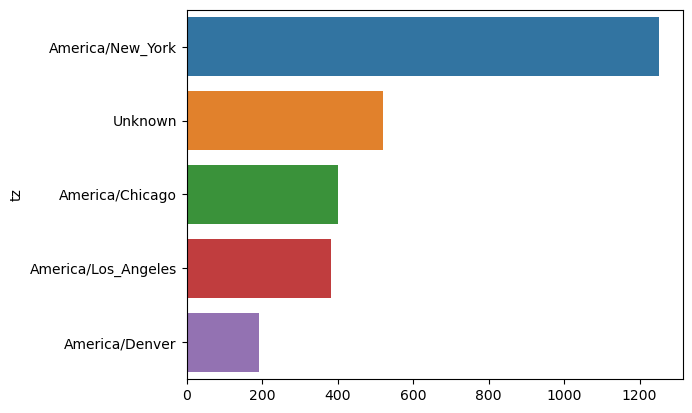

In [272]:
sns.barplot(x=subset.to_numpy(), y=subset.index)

In [274]:
frame['a'][0]

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11'

In [279]:
result = pd.Series([x.split()[0] for x in frame['a'].dropna()])

In [281]:
result.value_counts().head()

Mozilla/5.0               2594
Mozilla/4.0                601
GoogleMaps/RochesterNY     121
Opera/9.80                  34
TEST_INTERNET_AGENT         24
Name: count, dtype: int64

In [282]:
cframe = frame[frame['a'].notna()].copy()

In [285]:
cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

In [288]:
by_tz_os = cframe.groupby(['tz', 'os'])

In [292]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [294]:
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [319]:
indexer = agg_counts.sum(axis='columns').argsort()

In [320]:
indexer.values[:10]

array([24, 20, 21, 92, 87, 53, 54, 57, 26, 55], dtype=int64)

In [321]:
top_tz = agg_counts.take(indexer[-10:])

In [322]:
top_tz

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [323]:
##ANother approach
top_tz2 = agg_counts.sum('columns').nlargest(10)

In [324]:
top_tz2

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [325]:
top_tz

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [326]:
top_tz = top_tz.stack()

In [328]:
top_tz.name = 'total'

In [330]:
top_tz = top_tz.reset_index()

In [332]:
top_tz.head()

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0


C:\Users\Ali Sawah\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ali Sawah\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ali Sawah\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ali Sawah\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Axes: xlabel='total', ylabel='tz'>

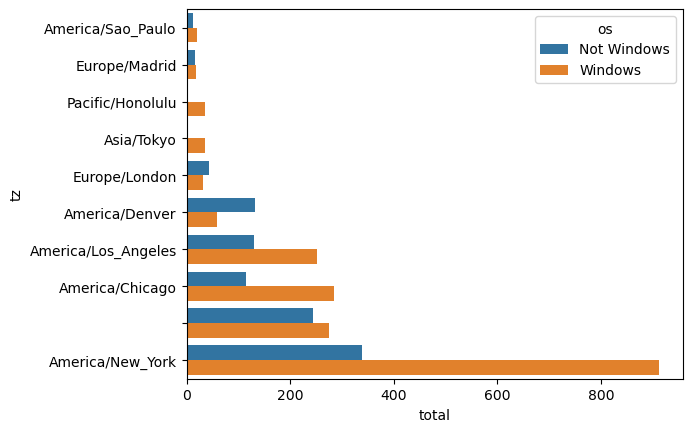

In [333]:
sns.barplot(x='total', y='tz', hue='os', data=top_tz)

In [340]:
##Normalizing to sum to 1
def normalize(group):
    group['Normal_total'] = group['total']/group['total'].sum()
    return group

In [341]:
top_tz

,tz,os,total,Normal_total
0,America/Sao_Paulo,Not Windows,13.0,0.004392
1,America/Sao_Paulo,Windows,20.0,0.006757
2,Europe/Madrid,Not Windows,16.0,0.005405
3,Europe/Madrid,Windows,19.0,0.006419
4,Pacific/Honolulu,Not Windows,0.0,0.000000
5,Pacific/Honolulu,Windows,36.0,0.012162
6,Asia/Tokyo,Not Windows,2.0,0.000676
7,Asia/Tokyo,Windows,35.0,0.011824
8,Europe/London,Not Windows,43.0,0.014527
9,Europe/London,Windows,31.0,0.010473


In [342]:
results = top_tz.groupby('tz').apply(normalize)

In [343]:
results

tz           os  total  Normal_total
tz                                                                           
                    16                       Not Windows  245.0      0.470250
                    17                           Windows  276.0      0.529750
America/Chicago     14      America/Chicago  Not Windows  115.0      0.287500
                    15      America/Chicago      Windows  285.0      0.712500
America/Denver      10       America/Denver  Not Windows  132.0      0.691099
                    11       America/Denver      Windows   59.0      0.308901
America/Los_Angeles 12  America/Los_Angeles  Not Windows  130.0      0.340314
                    13  America/Los_Angeles      Windows  252.0      0.659686
America/New_York    18     America/New_York  Not Windows  339.0      0.270983
                    19     America/New_York      Windows  912.0      0.729017
America/Sao_Paulo   0     America/Sao_Paulo  Not Windows   13.0      0.393939
                    1     America/Sao_Paulo      Windows   20.0      0.606061
Asia/Tokyo          6            Asia/Tokyo  Not Windows    2.0      0.054054
                    7            Asia/Tokyo      Windows   35.0      0.945946
Europe/London       8         Europe/London  Not Windows   43.0      0.581081
                    9         Europe/London      Windows   31.0      0.418919
Europe/Madrid       2         Europe/Madrid  Not Windows   16.0      0.457143
                    3         Europe/Madrid      Windows   19.0      0.542857
Pacific/Honolulu    4      Pacific/Honolulu  Not Windows    0.0      0.000000
                    5      Pacific/Honolulu      Windows   36.0      1.000000

C:\Users\Ali Sawah\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ali Sawah\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ali Sawah\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ali Sawah\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

<Axes: xlabel='Normal_total', ylabel='tz'>

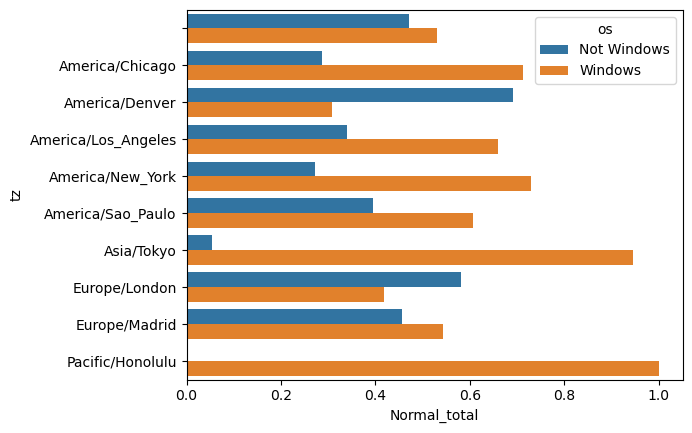

In [344]:
sns.barplot(x='Normal_total', y='tz', hue='os', data=results)

In [345]:
top_tz

,tz,os,total,Normal_total
0,America/Sao_Paulo,Not Windows,13.0,0.004392
1,America/Sao_Paulo,Windows,20.0,0.006757
2,Europe/Madrid,Not Windows,16.0,0.005405
3,Europe/Madrid,Windows,19.0,0.006419
4,Pacific/Honolulu,Not Windows,0.0,0.000000
5,Pacific/Honolulu,Windows,36.0,0.012162
6,Asia/Tokyo,Not Windows,2.0,0.000676
7,Asia/Tokyo,Windows,35.0,0.011824
8,Europe/London,Not Windows,43.0,0.014527
9,Europe/London,Windows,31.0,0.010473
